此程序给出过9个点的两个三次样条函数S(X;t)和S(Y;t)

构建t，然后计算对应的φ

In [66]:
import numpy as np
tlist = np.arange(0,9,1)
def phi(t):
    phi = t*np.pi/4
    return phi
print(tlist)
print(phi(tlist))

[0 1 2 3 4 5 6 7 8]
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714 6.28318531]


计算对应的x，y

In [67]:
def x(t):
    x = (1-np.cos(phi(t)))*np.cos(phi(t))
    return x
def y(t):
    y = (1-np.cos(phi(t))) * np.sin(phi(t))
    return y
xlist = x(tlist)
ylist = y(tlist)

传入函数值(x or y)，获得三次样条函数内插各个区间上的系数，以m，A，B三个列表的形式范围。步骤与3c中的完全相同

In [68]:
def getMAB(y):
    n=9
    d = 6*(y[:n-2]/2 + y[2:]/2 - y[1:n-1])
    d = np.concatenate(([0], d, [0]))
    a = np.concatenate(([1], np.full(n-2,2), [1]))
    b = np.concatenate((np.full(n-2,0.5),[0]))
    c = np.concatenate(([0], np.full(n-2,0.5)))
    alpha = np.ones(n)
    beta = np.ones(n-1)
    for i in range(n-1):
        beta[i] = b[i] / alpha[i]
        alpha[i+1] = a[i+1] - beta[i]*c[i]
    yy = np.zeros(n)
    yy[0] = d[0]
    for i in range(1,n):
        yy[i] = d[i] - yy[i] * beta[i-1]
    m = np.zeros(n)
    m[n-1] = yy[n-1] / alpha[n-1]

    for i in range(n-2,-1,-1):
        m[i] = (yy[i] - c[i] * m[i+1])/alpha[i]
    A = (y[1:] - y[:n-1]) - (m[1:] - m[:n-1])/6
    B = y-m/6
    return m,A,B

调用函数获得m，A，B

In [69]:
mx,Ax,Bx = getMAB(xlist)
my,Ay,By = getMAB(ylist)

定义三次样条函数

In [70]:
def gx(t):
    j = np.searchsorted(tlist,t) -1

    #这是为了保证searchsorted的返回值在索引范围内
    np.clip(j,0,8)
    j[0] = 0 

    res = -mx[j] *(t-tlist[j+1])**3/6 + mx[j+1]*(t-tlist[j])**3/6+Ax[j]*(t-tlist[j])+Bx[j]
    return res

def gy(t):
    j = np.searchsorted(tlist,t) -1
    np.clip(j,0,8)
    j[0] = 0
    res = -my[j] *(t-tlist[j+1])**3/6 + my[j+1]*(t-tlist[j])**3/6+Ay[j]*(t-tlist[j])+By[j]
    return res

在0到8的范围内创建很多个点用于显示，分别计算其精确x值，精确y值，样条x值，样条y值

In [71]:
tshowlist = np.arange(0,8.0,0.02)
xshowlist = x(tshowlist)
gxshowlist = gx(tshowlist)
yshowlist = y(tshowlist)
gyshowlist = gy(tshowlist)

画出严格心型线和样条内插心型线，并在图上标注9个节点

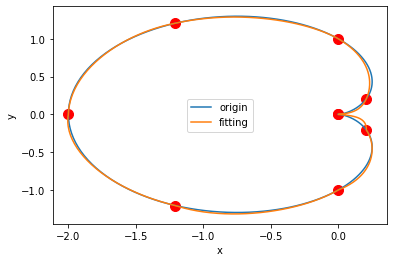

In [72]:
import matplotlib.pyplot as plt

plt.plot(xshowlist, yshowlist, label='origin')
plt.plot(gxshowlist, gyshowlist, label='fitting')
plt.scatter(xlist,ylist,s=100,c='red')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()